In [1]:
import numpy as np
import pandas as pd

weather = pd.read_csv("weather_data.csv")

In [2]:
weather.head()

Location            Date_Time  Temperature_C  Humidity_pct  \
0     San Diego  2024-01-14 21:12:46      10.683001     41.195754   
1     San Diego  2024-05-17 15:22:10       8.734140     58.319107   
2     San Diego  2024-05-11 09:30:59      11.632436     38.820175   
3  Philadelphia  2024-02-26 17:32:39      -8.628976     54.074474   
4   San Antonio  2024-04-29 13:23:51      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622

In [3]:
weather.tail()

Location            Date_Time  Temperature_C  Humidity_pct  \
999995       Dallas  2024-01-01 20:29:48      23.416877     37.705024   
999996  San Antonio  2024-01-20 15:59:48       6.759080     40.731036   
999997     New York  2024-04-14 08:30:09      15.664465     62.201884   
999998      Chicago  2024-05-12 20:10:43      18.999994     63.703245   
999999     New York  2024-04-16 16:11:52      10.725351     43.804584   

        Precipitation_mm  Wind_Speed_kmh  
999995          3.819833       16.538119  
999996          8.182785       29.005558  
999997          3.987558        0.403909  
999998          4.294325        6.326036  
999999          1.883292       15.363828

In [4]:
weather.describe()

Temperature_C    Humidity_pct  Precipitation_mm  Wind_Speed_kmh
count  1000000.000000  1000000.000000    1000000.000000  1000000.000000
mean        14.779705       60.021830          5.109639       14.997598
std         14.482558       17.324022          2.947997        8.663556
min        -19.969311       30.000009          0.000009        0.000051
25%          2.269631       45.008500          2.580694        7.490101
50%         14.778002       60.018708          5.109917       14.993777
75%         27.270489       75.043818          7.613750       22.514110
max         39.999801       89.999977         14.971583       29.999973

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [6]:
weather["Date_Time"] = pd.to_datetime(weather["Date_Time"])
weather["Month"] = weather["Date_Time"].dt.month_name()
weather.head()

Location           Date_Time  Temperature_C  Humidity_pct  \
0     San Diego 2024-01-14 21:12:46      10.683001     41.195754   
1     San Diego 2024-05-17 15:22:10       8.734140     58.319107   
2     San Diego 2024-05-11 09:30:59      11.632436     38.820175   
3  Philadelphia 2024-02-26 17:32:39      -8.628976     54.074474   
4   San Antonio 2024-04-29 13:23:51      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh     Month  
0          4.020119        8.233540   January  
1          9.111623       27.715161       May  
2          4.607511       28.732951       May  
3          3.183720       26.367303  February  
4          9.598282       29.898622     April

## Visualization

Violin Plot

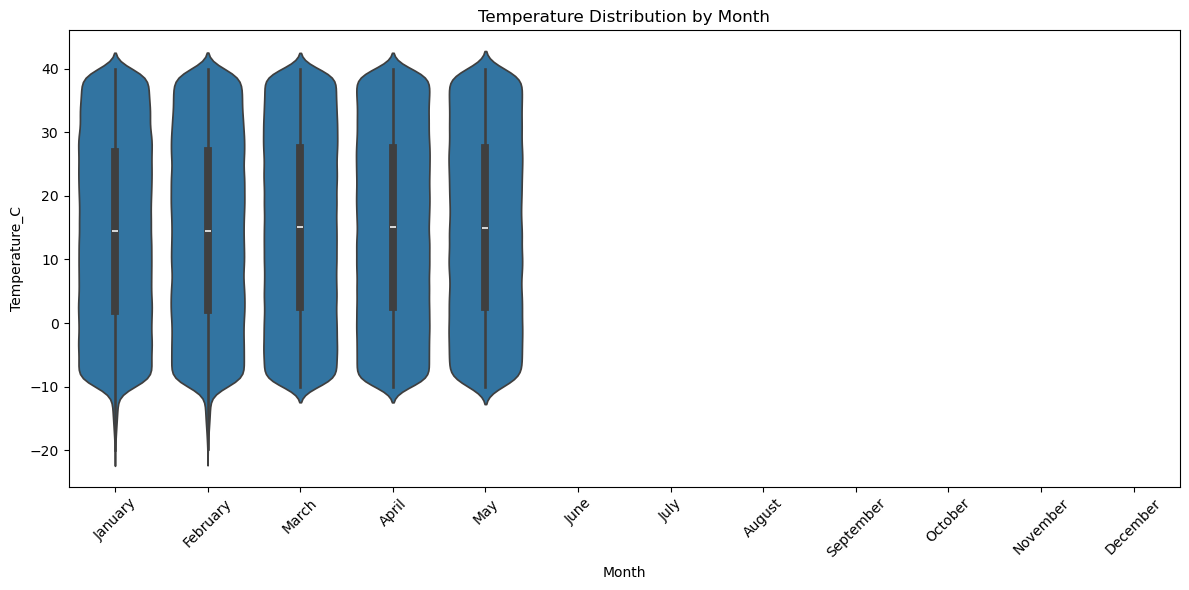

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.violinplot(data=weather, x='Month', y='Temperature_C', order=pd.date_range('2023-01-01', periods=12, freq='MS').strftime('%B'))
plt.title('Temperature Distribution by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Pair Plot

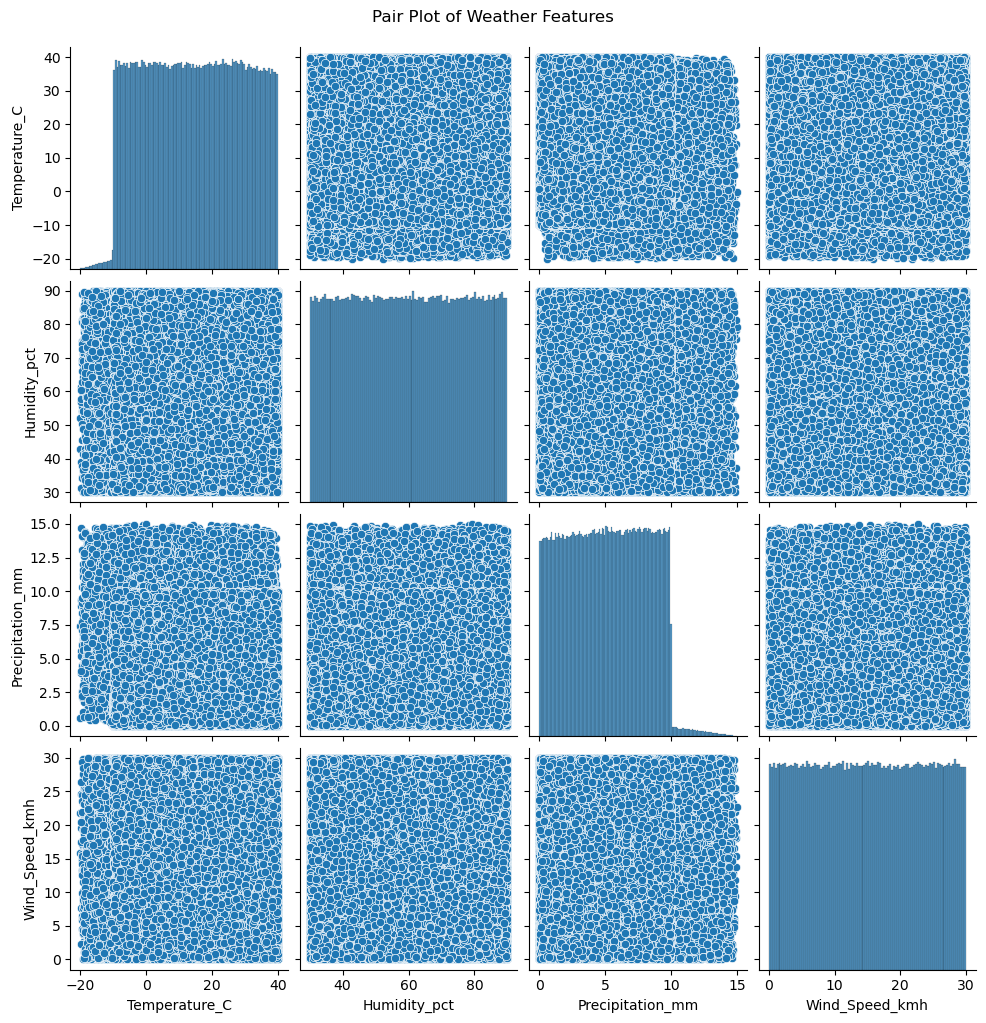

In [8]:
sns.pairplot(weather[["Temperature_C", "Humidity_pct", "Precipitation_mm", "Wind_Speed_kmh"]])
plt.suptitle("Pair Plot of Weather Features", y=1.02)
plt.show()


Pie Chart

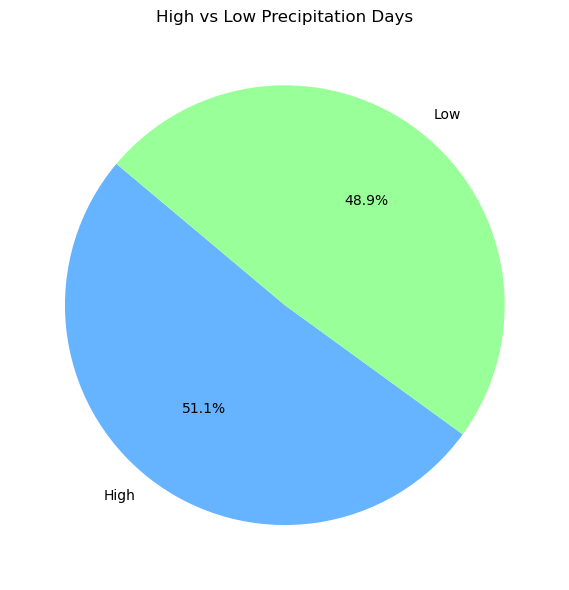

In [10]:
weather["Precip_Level"] = weather["Precipitation_mm"].apply(lambda x: "High" if x > 5 else "Low")

precip_counts = weather["Precip_Level"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(precip_counts, labels=precip_counts.index, autopct="%1.1f%%", startangle=140, colors=['#66b3ff','#99ff99'])
plt.title("High vs Low Precipitation Days")
plt.tight_layout()
plt.show()


3d Scatter

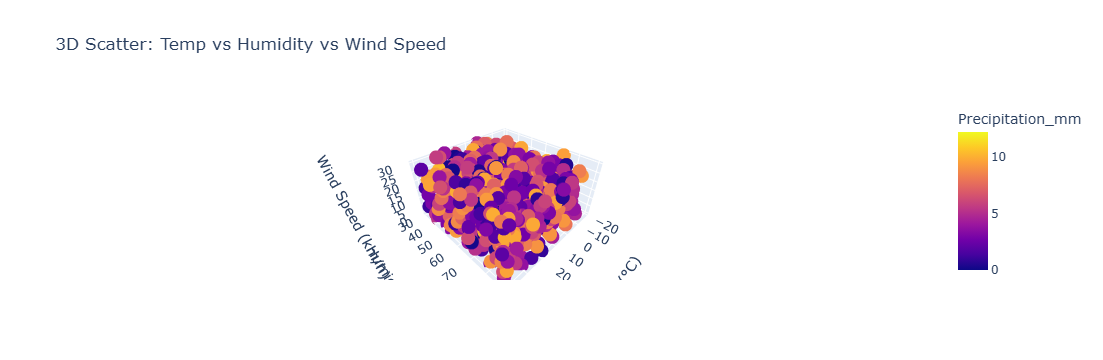

In [12]:
import plotly.express as px
fig = px.scatter_3d(weather.sample(1000), 
                    x='Temperature_C', 
                    y='Humidity_pct', 
                    z='Wind_Speed_kmh',
                    color='Precipitation_mm',
                    title='3D Scatter: Temp vs Humidity vs Wind Speed',
                    labels={'Temperature_C': 'Temp (°C)', 'Humidity_pct': 'Humidity (%)', 'Wind_Speed_kmh': 'Wind Speed (km/h)'})
fig.show()


## Model

In [13]:
# Drop unneccesary columns
weather_model = weather.drop(columns=["Location", "Date_Time"])

In [19]:
weather_model.head()

Temperature_C  Humidity_pct  Precipitation_mm  Wind_Speed_kmh     Month  \
0      10.683001     41.195754          4.020119        8.233540   January   
1       8.734140     58.319107          9.111623       27.715161       May   
2      11.632436     38.820175          4.607511       28.732951       May   
3      -8.628976     54.074474          3.183720       26.367303  February   
4      39.808213     72.899908          9.598282       29.898622     April   

  Precip_Level  
0          Low  
1         High  
2          Low  
3          Low  
4         High

In [15]:
X = weather_model.drop("Temperature_C", axis=1)
y = weather_model["Temperature_C"]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
categorical_features = ["Month"]
numeric_features = ["Humidity_pct", "Precipitation_mm", "Wind_Speed_kmh"]

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', 
                                alpha=0.0001, learning_rate='invscaling', 
                                eta0=0.01, random_state=42))
])

In [24]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Humidity_pct',
                                                   'Precipitation_mm',
                                                   'Wind_Speed_kmh']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Month'])])),
                ('regressor', SGDRegressor(random_state=42))])

In [25]:
y_pred = pipeline.predict(X_test)

In [27]:
from sklearn.metrics import root_mean_squared_error, r2_score
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 14.47
R² Score: 0.0003
